In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
df=pd.read_csv('alllines_ptl_complete.csv', parse_dates=[0], index_col=0, date_parser=parser)

In [4]:
df


,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2018-08-01,3,38679000.0,1440000.0,884000.0,504000.0,1483000.0
2018-08-01,1,37775000.0,1420000.0,832000.0,446000.0,1466000.0
2018-08-01,15,516000.0,22000.0,NaN,2000.0,23000.0
2018-08-01,2,18164000.0,701000.0,318000.0,194000.0,723000.0
2018-08-01,5,7220000.0,309000.0,176000.0,85000.0,322000.0
...,...,...,...,...,...,...
2023-04-01,2,14544000.0,649000.0,299000.0,189000.0,671000.0
2023-04-01,4,15070570.0,661450.0,338300.0,201580.0,701710.0
2023-04-01,5,11792220.0,510810.0,282420.0,160710.0,527250.0


In [5]:
gdp=pd.read_csv('gdp_trends.csv', parse_dates=[0], index_col=0, date_parser=parser)

In [6]:
gdp

,BRALORSGPNOSTSAM
DATE,
1996-02-01,98.327176
1996-03-01,98.691036
1996-04-01,99.064889
1996-05-01,99.453414
1996-06-01,99.844871
...,...
2022-10-01,100.595629
2022-11-01,100.682424
2022-12-01,100.848663


In [7]:
gdp=gdp.shift(periods=1)

In [8]:
gdp.rename(columns = {'BRALORSGPNOSTSAM':'GDP'}, inplace = True)

In [9]:
gdp

,GDP
DATE,
1996-02-01,NaN
1996-03-01,98.327176
1996-04-01,98.691036
1996-05-01,99.064889
1996-06-01,99.453414
...,...
2022-10-01,100.570596
2022-11-01,100.595629
2022-12-01,100.682424


In [10]:
l3=df[df['line']==3]

In [11]:
l3 = l3.asfreq(pd.infer_freq(l3.index))

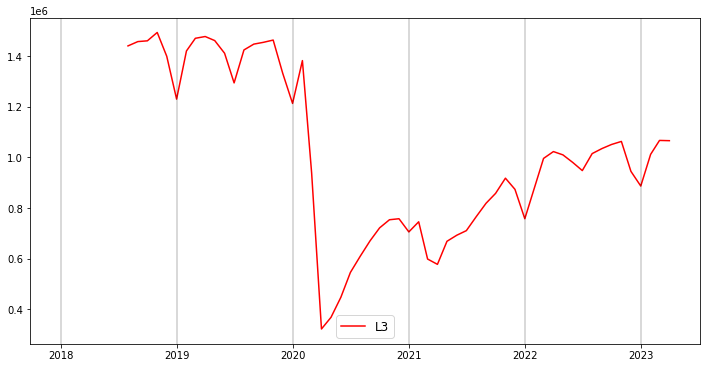

In [12]:
plt.figure(figsize=(12,6))
L3, = plt.plot(l3['MDU (Business Days Mean)'], color='red')
for year in range(2018, 2024):
    plt.axvline(datetime(year,1,1),  color='k', alpha=0.2)
plt.legend(['L3'], fontsize=12)
plt.show()

In [13]:
start_date = datetime(2020,1,1)
end_date = datetime(2023,4,1)
l3 = l3[start_date:end_date]
gdp = gdp[start_date:end_date]

In [14]:
l3

,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2020-01-01,3,31597000.0,1213000.0,721000.0,428000.0,1319000.0
2020-02-01,3,31992000.0,1382000.0,860000.0,528000.0,1451000.0
2020-03-01,3,24332000.0,939000.0,511000.0,325000.0,1478000.0
2020-04-01,3,7984000.0,323000.0,189000.0,117000.0,362000.0
2020-05-01,3,8889000.0,369000.0,215000.0,127000.0,385000.0
2020-06-01,3,11542000.0,448000.0,272000.0,152000.0,494000.0
2020-07-01,3,14675000.0,546000.0,359000.0,182000.0,593000.0
2020-08-01,3,15807000.0,610000.0,398000.0,202000.0,660000.0
2020-09-01,3,17121000.0,671000.0,453000.0,233000.0,698000.0


In [15]:
gdp

,GDP
DATE,
2020-01-01,100.660771
2020-02-01,100.725506
2020-03-01,100.765548
2020-04-01,94.090060
2020-05-01,92.569423
2020-06-01,91.793724
2020-07-01,93.563862
2020-08-01,95.324908
2020-09-01,97.069606


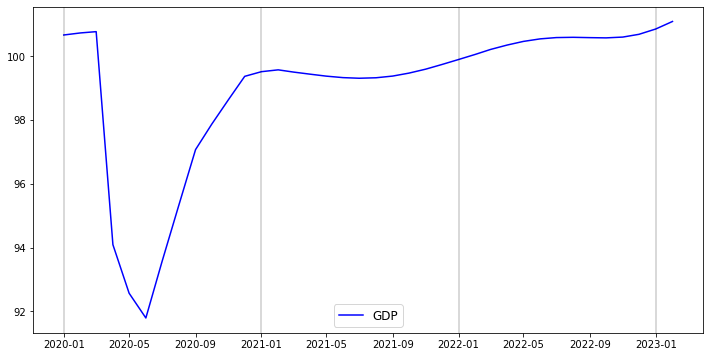

In [16]:
plt.figure(figsize=(12,6))
GDP, = plt.plot(gdp['GDP'],color='blue')
for year in range(2020, 2024):
    plt.axvline(datetime(year,1,1),  color='k', alpha=0.2)
plt.legend(['GDP'], fontsize=12)
plt.show()

In [17]:
l3.drop(columns=['line'],inplace=True)

In [18]:
l3

,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,
2020-01-01,31597000.0,1213000.0,721000.0,428000.0,1319000.0
2020-02-01,31992000.0,1382000.0,860000.0,528000.0,1451000.0
2020-03-01,24332000.0,939000.0,511000.0,325000.0,1478000.0
2020-04-01,7984000.0,323000.0,189000.0,117000.0,362000.0
2020-05-01,8889000.0,369000.0,215000.0,127000.0,385000.0
2020-06-01,11542000.0,448000.0,272000.0,152000.0,494000.0
2020-07-01,14675000.0,546000.0,359000.0,182000.0,593000.0
2020-08-01,15807000.0,610000.0,398000.0,202000.0,660000.0
2020-09-01,17121000.0,671000.0,453000.0,233000.0,698000.0


In [19]:
result = pd.concat([l3, gdp], axis=1, join='inner')

In [20]:
result

,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max),GDP
2020-01-01,31597000.0,1213000.0,721000.0,428000.0,1319000.0,100.660771
2020-02-01,31992000.0,1382000.0,860000.0,528000.0,1451000.0,100.725506
2020-03-01,24332000.0,939000.0,511000.0,325000.0,1478000.0,100.765548
2020-04-01,7984000.0,323000.0,189000.0,117000.0,362000.0,94.090060
2020-05-01,8889000.0,369000.0,215000.0,127000.0,385000.0,92.569423
2020-06-01,11542000.0,448000.0,272000.0,152000.0,494000.0,91.793724
2020-07-01,14675000.0,546000.0,359000.0,182000.0,593000.0,93.563862
2020-08-01,15807000.0,610000.0,398000.0,202000.0,660000.0,95.324908
2020-09-01,17121000.0,671000.0,453000.0,233000.0,698000.0,97.069606
2020-10-01,18881000.0,722000.0,482000.0,252000.0,759000.0,97.866773


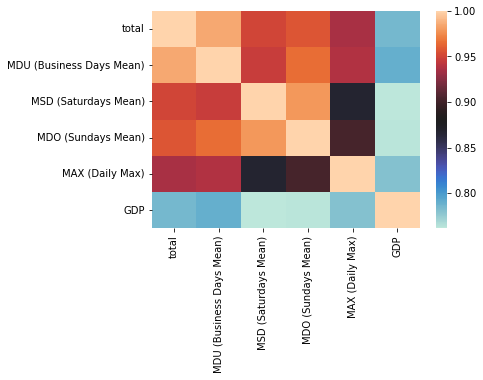

In [23]:
sns.heatmap(result.corr(),cmap='icefire')
plt.show()

In [22]:
result.corr()

,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max),GDP
total,1.000000,0.984833,0.950476,0.956846,0.935545,0.785322
MDU (Business Days Mean),0.984833,1.000000,0.946354,0.964840,0.938018,0.789995
MSD (Saturdays Mean),0.950476,0.946354,1.000000,0.979238,0.867473,0.761418
MDO (Sundays Mean),0.956846,0.964840,0.979238,1.000000,0.903019,0.762725
MAX (Daily Max),0.935545,0.938018,0.867473,0.903019,1.000000,0.780103
GDP,0.785322,0.789995,0.761418,0.762725,0.780103,1.000000
